In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 60s 61ms/step - loss: 0.1896 - accuracy: 0.9412
Epoch 2/5
938/938 [==============================] - 57s 60ms/step - loss: 0.0477 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0317 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0248 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0198 - accuracy: 0.9940


In [6]:
model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 4s 10ms/step - loss: 0.0307 - accuracy: 0.9913


0.9912999868392944

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0307 - accuracy: 0.9913


In [8]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [9]:
import numpy as np
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

In [10]:
incorrect_indices = np.where(predicted_labels != true_labels)[0]

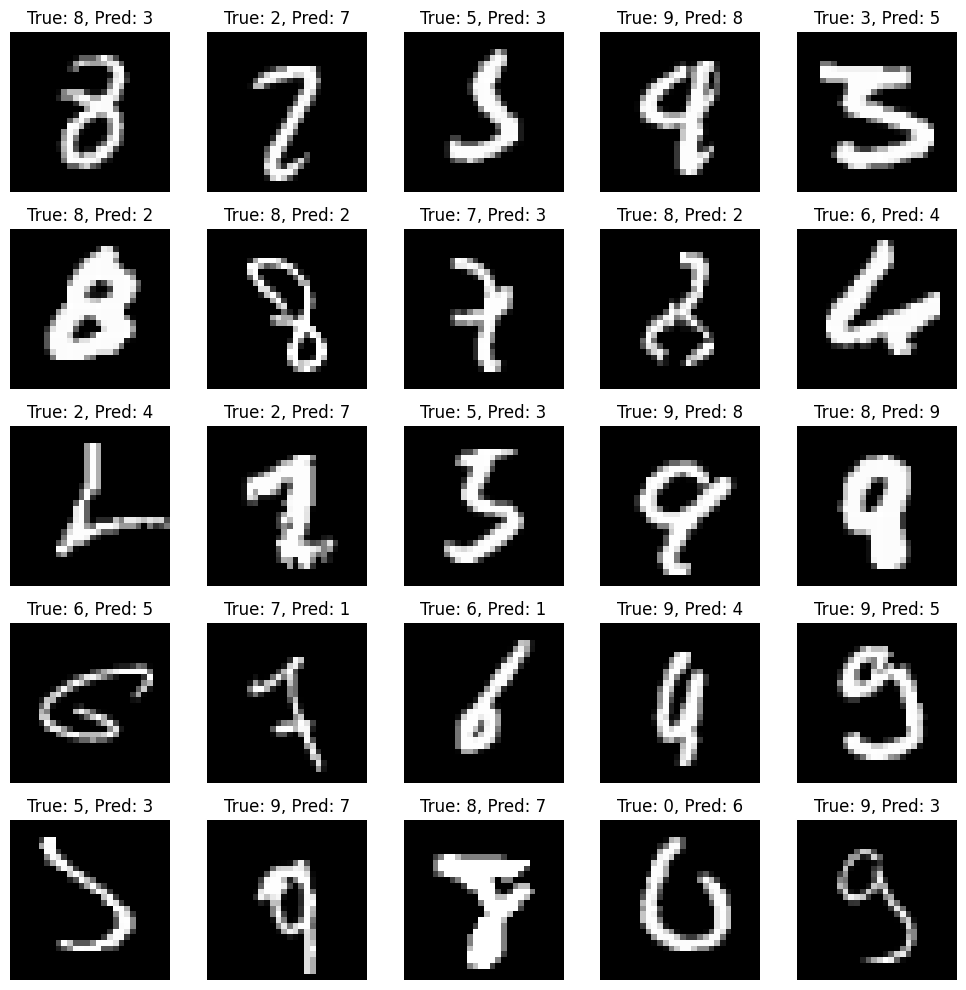

In [11]:
from matplotlib import pyplot as plt
num_images_to_show = 25
plt.figure(figsize=(10, 10))
for i in range(min(num_images_to_show, len(incorrect_indices))):
    index = incorrect_indices[i]
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[index]}, Pred: {predicted_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
def test_random_index():
    index = np.random.randint(0, len(test_images))
    image = test_images[index]
    true_label = true_labels[index]
    predicted_label = predicted_labels[index]

    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
    plt.show()

In [13]:
def display_random_images():
    indices = np.random.choice(range(len(test_images)), 25, replace=False)
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Index: {idx}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    return indices


In [14]:
def show_prediction(index):
    image = test_images[index]
    true_label = true_labels[index]
    predicted_label = predicted_labels[index]

    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
    plt.show()

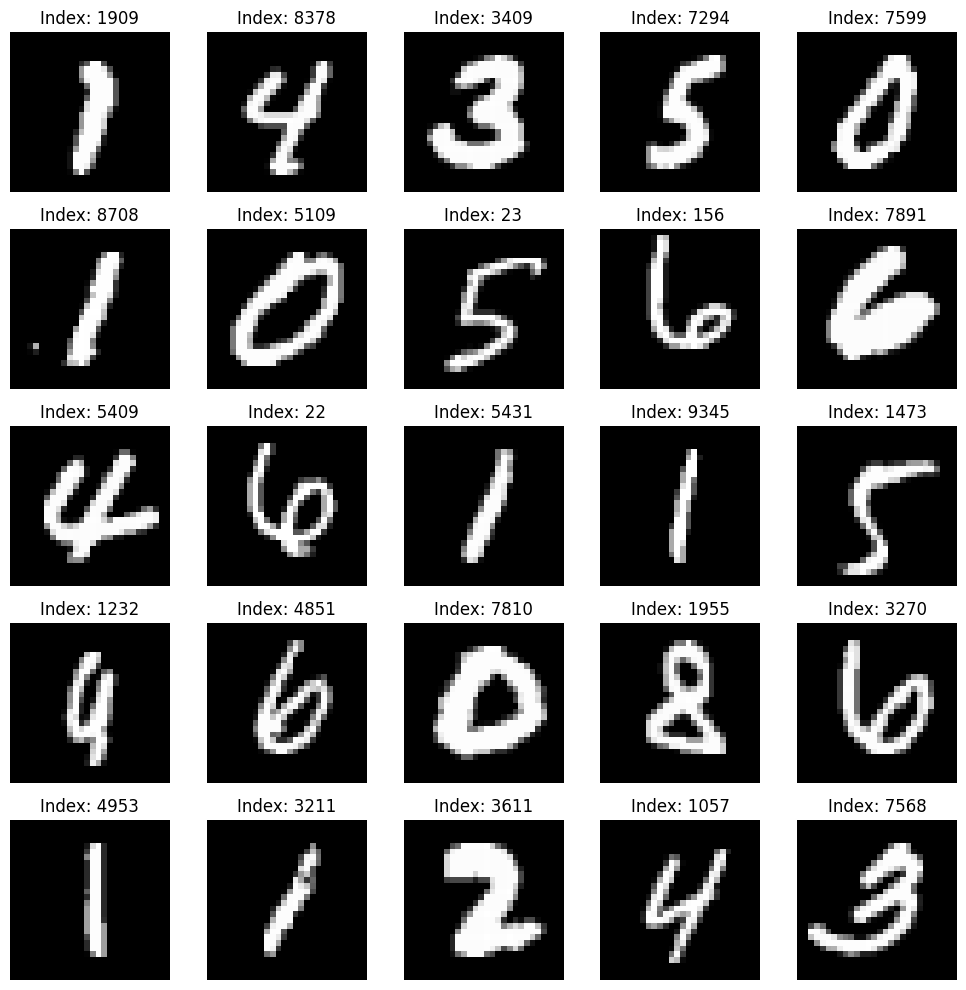

In [15]:
indices = display_random_images()

Enter the index of the image you want to see the prediction for: 7810


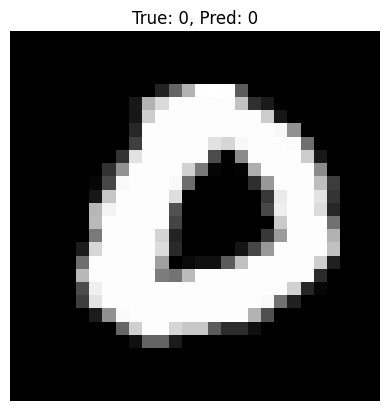

In [16]:
index_to_check = int(input("Enter the index of the image you want to see the prediction for: "))
if index_to_check in indices:
    show_prediction(index_to_check)
else:
    print(f"Index {index_to_check} is not in the displayed indices.")

#### 